In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [2]:
df=pd.read_csv("/content/Walmart DataSet.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
df.set_index('Date', inplace=True)
a= int(input("Enter the store id:"))
store = df[df.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id:25


Weekly_Sales    float64
dtype: object

In [5]:
sales.head(20)

,Weekly_Sales
Date,
01-04-2011,618377.79
01-06-2012,694765.95
01-07-2011,706206.86
01-10-2010,658640.14
02-03-2012,643155.89
02-04-2010,822486.37
02-07-2010,759407.87
02-09-2011,699779.00
02-12-2011,878314.57


In [6]:
sales.reset_index(inplace = True)
sales['Date'] = pd.to_datetime(sales['Date'],format='%d-%m-%Y')
sales.set_index('Date',inplace = True)

In [7]:
print(sales.head())

            Weekly_Sales
Date                    
2011-04-01     618377.79
2012-06-01     694765.95
2011-07-01     706206.86
2010-10-01     658640.14
2012-03-02     643155.89


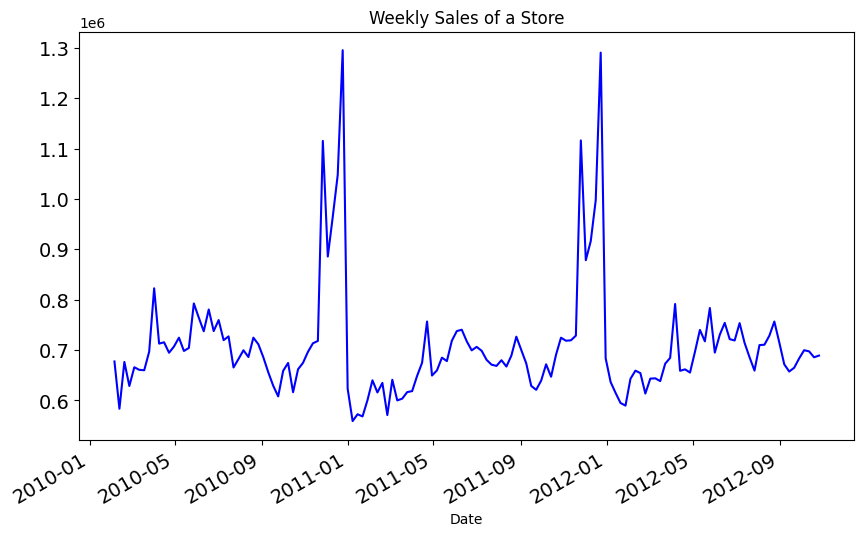

In [8]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

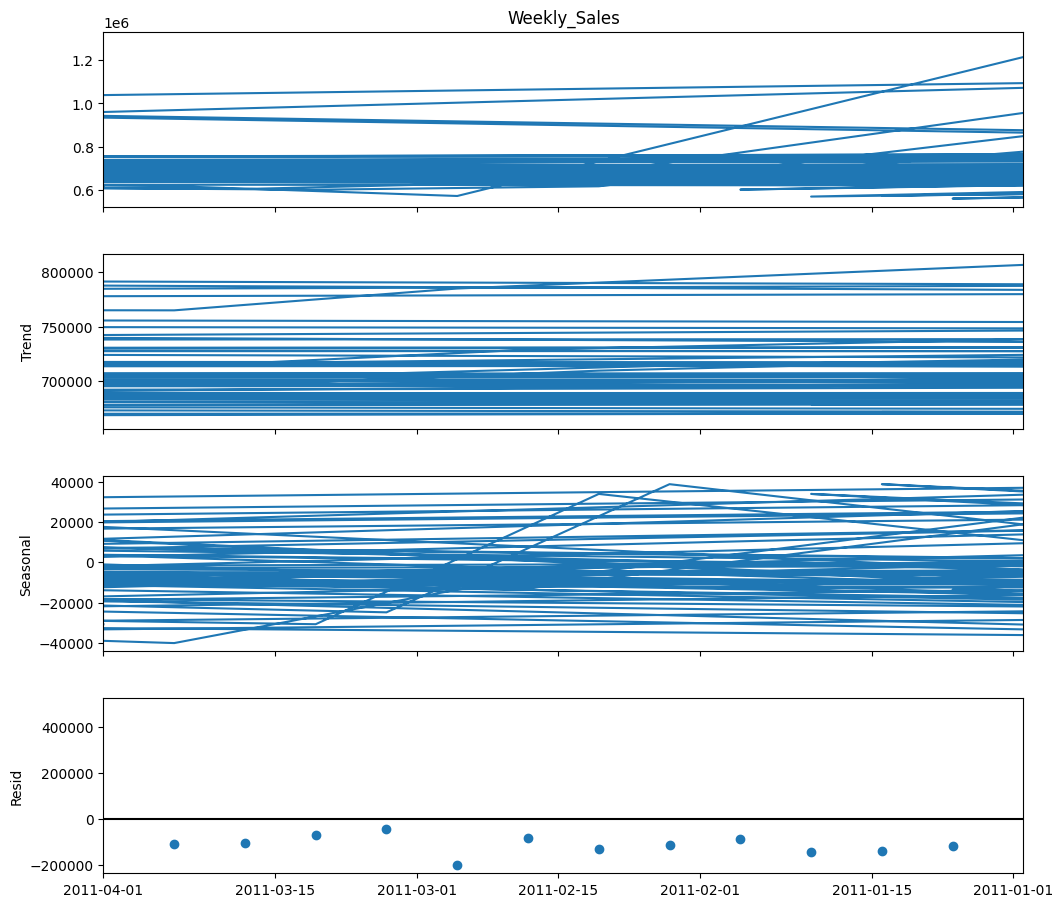

In [9]:

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [10]:
store5 = df[df.Store == 5]

sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.dtypes

sales5.reset_index(inplace = True)

sales5['Date'] = pd.to_datetime(sales5['Date'],format='%d-%m-%Y')
sales5.set_index('Date',inplace = True)

In [11]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [12]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

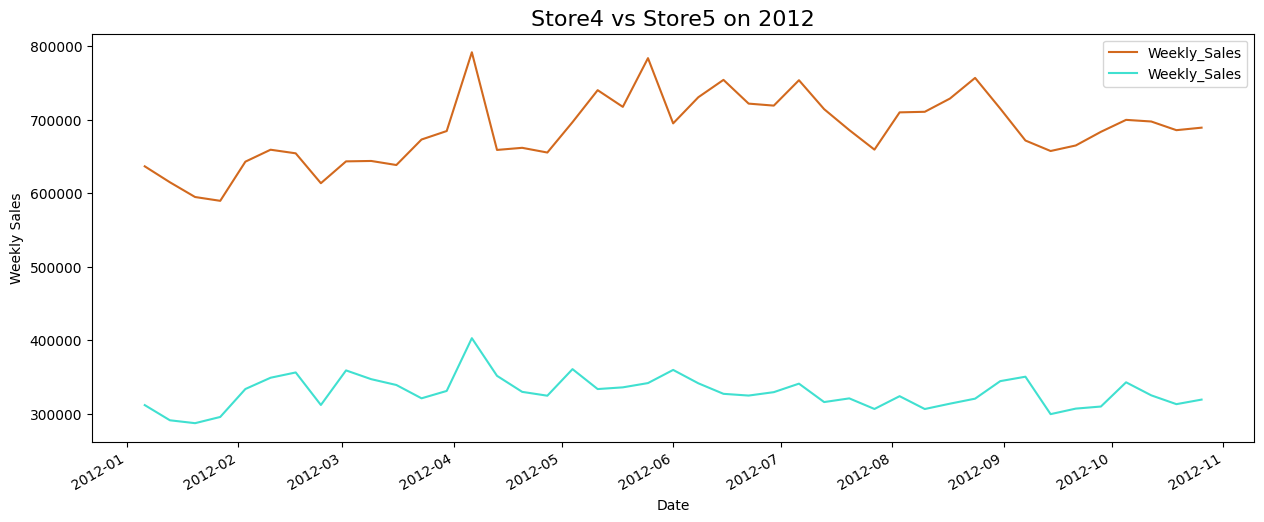

In [13]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store5 on 2012', fontsize = '16')
plt.show()

In [14]:
p = d = q = range(0, 5)
import itertools
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [15]:
sales5.sort_index(inplace=True)

# Address non-stationarity by differencing
# sales5['Diff'] = sales5['Sales'].diff(1)

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1843      0.372     -3.185      0.001      -1.913      -0.456
ar.L2         -1.1065      0.557     -1.986      0.047      -2.199      -0.014
ar.L3         -0.7861      0.408     -1.929      0.054      -1.585       0.013
ar.L4         -0.6557      0.224     -2.927      0.003      -1.095      -0.217
ma.L1         -2.3578      0.370     -6.372      0.000      -3.083      -1.633
ma.L2          1.7384      0.754      2.306      0.021       0.261       3.216
ma.L3         -0.3782      0.390     -0.970      0.332      -1.143       0.386
ar.S.L52      -0.5321      0.175     -3.041      0.002      -0.875      -0.189
sigma2      5.243e+10    4.4e-12   1.19e+22      0.000    5.24e+10    5.24e+10


<ipython-input-16-0b2061516065>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


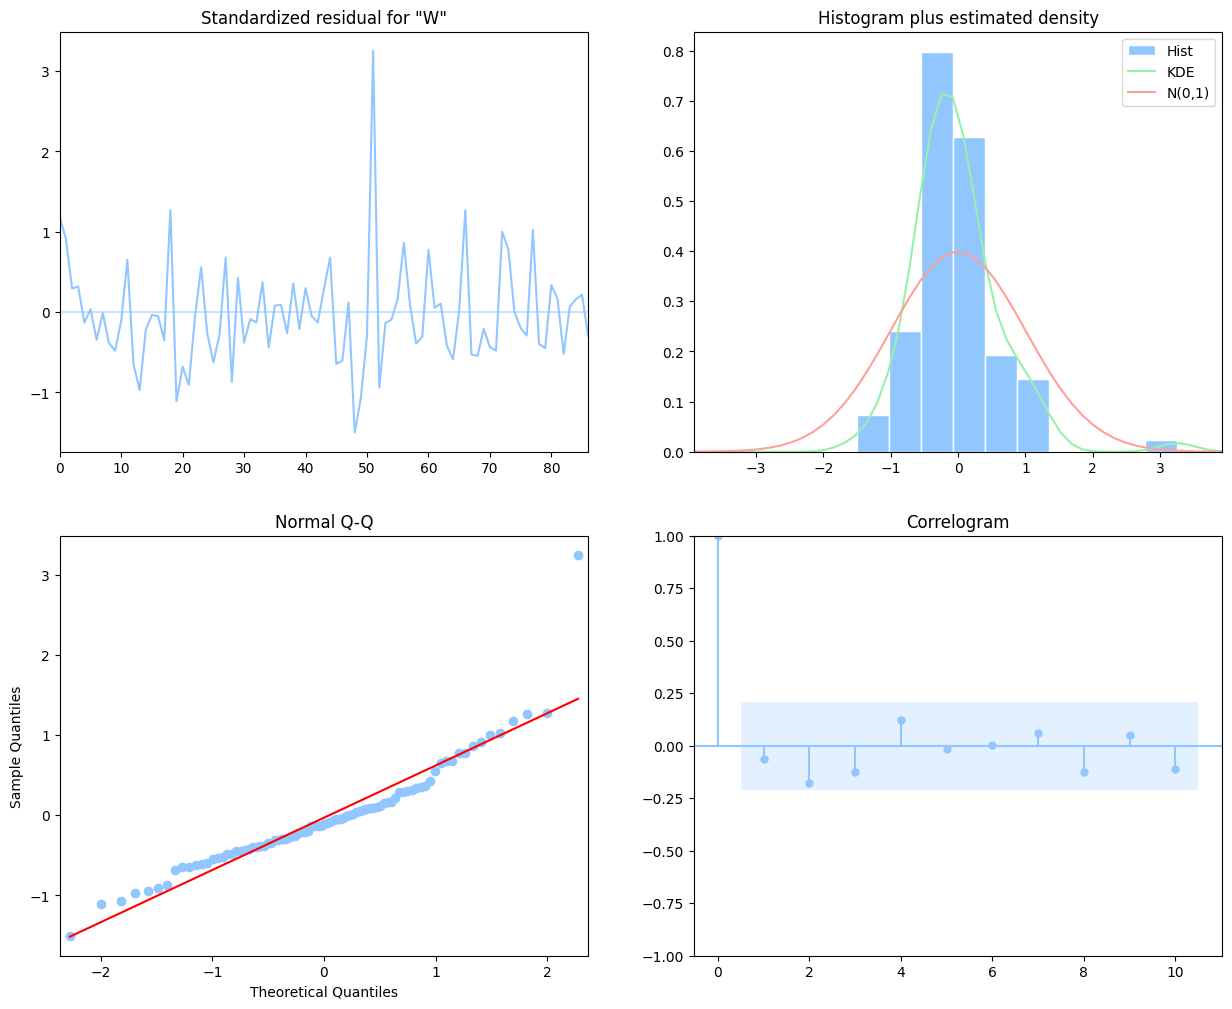

In [16]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

<ipython-input-18-4d1356b90131>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed')


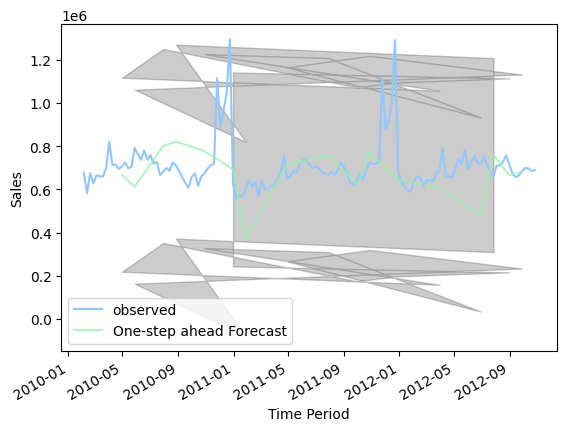

In [18]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4139345858.84


In [20]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<ipython-input-21-68fc9012ce26>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed', figsize=(12, 8))


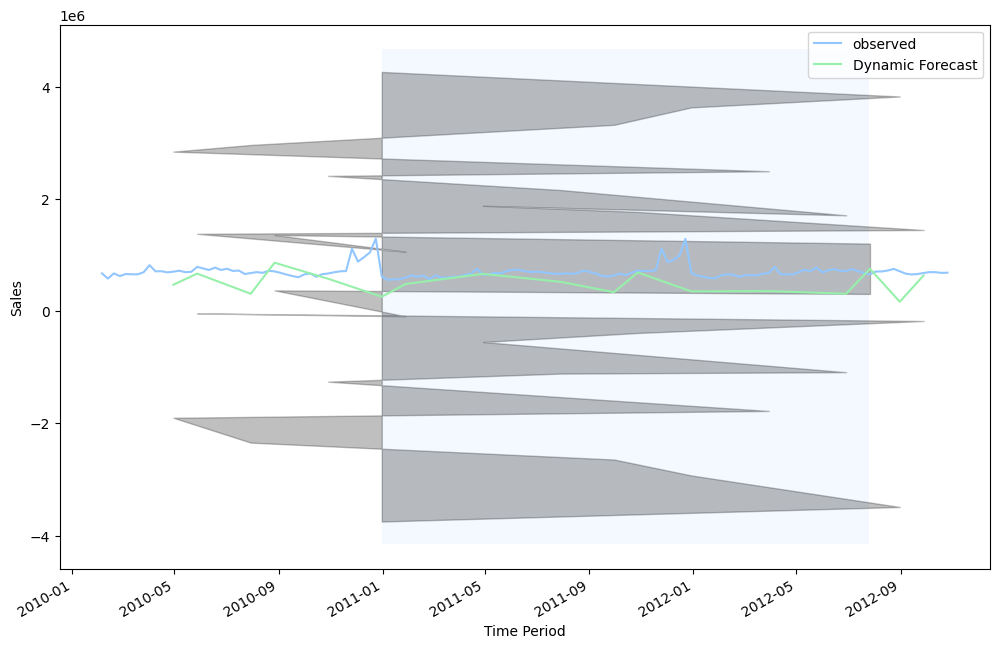

In [21]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [22]:
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    758875.546427
2010-08-27    866965.283355
2011-01-28    487341.657340
2010-05-28    672631.697448
2012-09-28    638950.777935
2011-10-28    693303.975673
2011-04-29    667505.348431
2012-06-29    313439.289310
2011-07-29    526628.264627
2010-10-29    580389.902742
2012-03-30    360788.657706
2010-04-30    474515.420850
2010-07-30    312776.910835
2011-09-30    341428.628959
2011-12-30    354817.189266
2012-08-31    171113.242607
2010-12-31    260410.025046
Name: predicted_mean, dtype: float64


In [23]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-08-03    709724.60
2012-10-05    699536.73
2012-09-07    671482.90
2012-08-10    710496.97
2012-10-12    697317.41
2012-09-14    657241.63
2012-08-17    728467.72
2012-10-19    685531.85
2012-09-21    664745.20
2012-08-24    756527.64
2012-10-26    688940.94
2012-07-27    659109.53
2012-09-28    683300.84
2012-08-31    714828.73
Name: Weekly_Sales, dtype: float64


In [24]:
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 320180.53


In [25]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 687831.5658853805


In [26]:
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [27]:
forecasted_values = pred_uc.predicted_mean

confidence_intervals = pred_uc.conf_int()

print("Forecasted Values:")
print(forecasted_values)

print("\nConfidence Intervals:")
print(confidence_intervals)

Forecasted Values:
143    673483.705462
144    639684.493756
145    796844.212366
146    688727.722962
147    608616.747332
148    681861.096610
149    621027.411394
150    802886.992422
151    654382.920552
152    594784.402649
153    668979.023414
154    650098.447863
Name: predicted_mean, dtype: float64

Confidence Intervals:
     lower Weekly_Sales  upper Weekly_Sales
143        2.246707e+05        1.122297e+06
144        1.460320e+05        1.133337e+06
145        2.214169e+05        1.372272e+06
146       -2.092626e+04        1.398382e+06
147       -2.027782e+05        1.420012e+06
148       -3.975095e+05        1.761232e+06
149       -5.934493e+05        1.835504e+06
150       -5.956753e+05        2.201449e+06
151       -9.826238e+05        2.291390e+06
152       -1.239666e+06        2.429235e+06
153       -1.467888e+06        2.805846e+06
154       -1.722669e+06        3.022866e+06


In [28]:
pred_ci = pred_uc.conf_int()

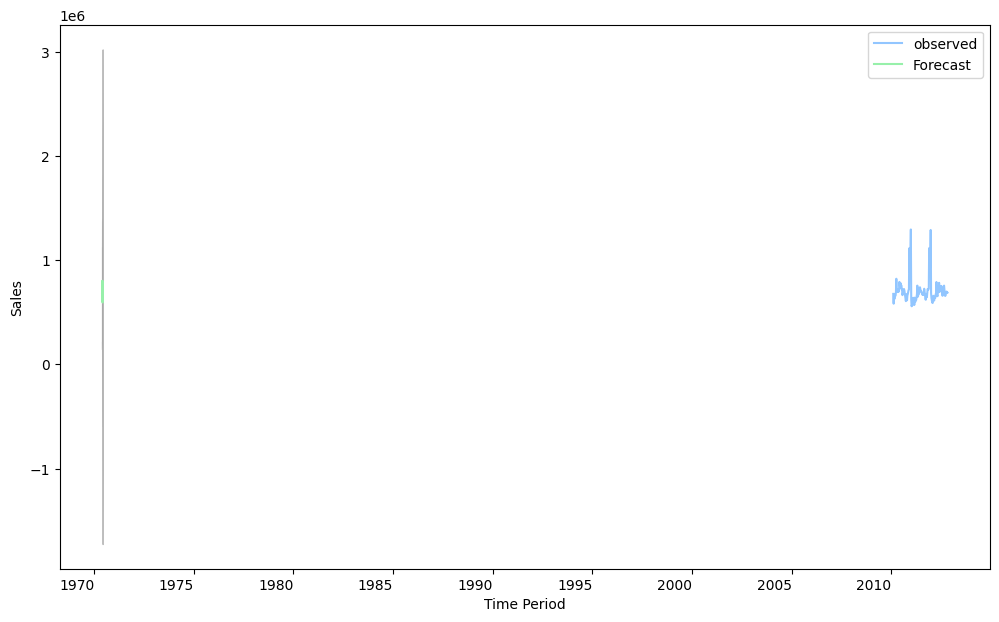

In [29]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()